# Proyecto PCA 

En este notebook vamos en primer lugar a fusionar dos dataset (hormonas y peso) para luego realizar un analisis PCA

In [1]:
cd C:\Users\GermanBo\Desktop\Kschool\proyectos\PCA

C:\Users\GermanBo\Desktop\Kschool\proyectos\PCA


C:\Users\GermanBo\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
!dir

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: DEF4-F44C

 Directorio de C:\Users\GermanBo\Desktop\Kschool\proyectos\PCA

27/02/2024  17:50    <DIR>          .
27/02/2024  17:50    <DIR>          ..
27/02/2024  17:51             5.508 fusion_hor_pes.csv
22/05/2023  17:04            13.224 HFeG_6_Rep.xlsx
16/09/2022  01:59            36.932 Hormonas _FeSBi.xlsx
08/11/2021  00:53           741.931 ICP_HFeG_6.xlsx
16/01/2024  15:43           115.189 nombre_del_archivo.csv
27/02/2024  17:50            20.361 Peso_FeSBi.xlsx
               6 archivos        933.145 bytes
               2 dirs  163.763.609.600 bytes libres


In [3]:
import pandas as pd

In [4]:
df_h = pd.read_excel('Hormonas _FeSBi.xlsx', sheet_name="Resumen", skiprows=1)
df_h = df_h[(df_h["t"] == 144) & (df_h["PRM"] == "P.a")]
df_h.head()


,PRM,trat,t,Muestra,IAA,ABA,SA,JA,JAIle,pmoles/g
188,P.a,Fe +,144,3A H 1,35.872005,29.616744,398.938155,8.369423,0.771506,NaN
189,P.a,Fe +,144,3A H 2,39.313590,26.122861,200.690131,7.923664,0.530082,NaN
190,P.a,Fe +,144,3A H 3,48.186750,29.534267,2159.692029,5.989211,0.360750,NaN
191,P.a,Fe +,144,3A H 4,33.123929,29.985728,333.584169,8.439205,0.737358,NaN
192,P.a,Fe +,144,3A H 5,37.862381,32.975808,233.548572,11.988633,0.489845,NaN


In [5]:
df_p = pd.read_excel("Peso_FeSBi.xlsx", skiprows=1)

df_p = df_p.iloc[0:40,]
df_p = df_p[["trat","P.aerea","Hoja","Raiz"]]
df_p.head()

,trat,P.aerea,Hoja,Raiz
0,Fe+,0.96,0.11,0.30
1,Fe+,1.01,0.10,0.35
2,Fe+,1.44,0.17,0.45
3,Fe+,0.95,0.07,0.28
4,Fe+,1.00,0.10,0.46


### Fusion datos


In [6]:
print( df_p.shape , df_h.shape)

(40, 4) (40, 10)


In [7]:
df_p.reset_index(drop=True, inplace=True)
df_h.reset_index(drop=True, inplace=True)

In [8]:
df_fusion = pd.concat([df_p, df_h], axis = 1)
df_fusion.head()

,trat,P.aerea,Hoja,Raiz,PRM,trat,t,Muestra,IAA,ABA,SA,JA,JAIle,pmoles/g
0,Fe+,0.96,0.11,0.30,P.a,Fe +,144,3A H 1,35.872005,29.616744,398.938155,8.369423,0.771506,NaN
1,Fe+,1.01,0.10,0.35,P.a,Fe +,144,3A H 2,39.313590,26.122861,200.690131,7.923664,0.530082,NaN
2,Fe+,1.44,0.17,0.45,P.a,Fe +,144,3A H 3,48.186750,29.534267,2159.692029,5.989211,0.360750,NaN
3,Fe+,0.95,0.07,0.28,P.a,Fe +,144,3A H 4,33.123929,29.985728,333.584169,8.439205,0.737358,NaN
4,Fe+,1.00,0.10,0.46,P.a,Fe +,144,3A H 5,37.862381,32.975808,233.548572,11.988633,0.489845,NaN


In [9]:
df_fusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trat      40 non-null     object 
 1   P.aerea   40 non-null     float64
 2   Hoja      40 non-null     float64
 3   Raiz      40 non-null     float64
 4   PRM       40 non-null     object 
 5   trat      40 non-null     object 
 6   t         40 non-null     int64  
 7   Muestra   40 non-null     object 
 8   IAA       40 non-null     float64
 9   ABA       40 non-null     float64
 10  SA        40 non-null     float64
 11  JA        40 non-null     float64
 12  JAIle     40 non-null     float64
 13  pmoles/g  0 non-null      float64
dtypes: float64(9), int64(1), object(4)
memory usage: 4.5+ KB


In [10]:
df_fusion.to_csv('fusion_hor_pes.csv', index=False)

### Analisis PCA 

In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn

In [11]:
cd C:\Users\GermanBo\Desktop\Kschool\proyectos\PCA

C:\Users\GermanBo\Desktop\Kschool\proyectos\PCA


C:\Users\GermanBo\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [31]:
df = pd.read_csv('fusion_hor_pes.csv')
df= df[["trat","P.aerea","Hoja","Raiz", "IAA","ABA","SA","JA"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   trat     40 non-null     object 
 1   P.aerea  40 non-null     float64
 2   Hoja     40 non-null     float64
 3   Raiz     40 non-null     float64
 4   IAA      40 non-null     float64
 5   ABA      40 non-null     float64
 6   SA       40 non-null     float64
 7   JA       40 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.6+ KB


In [29]:
df_1 = df.iloc[:,1:]

df_scaled = StandardScaler().fit_transform(df_1)
df_scaled

array([[-1.16559141,  0.14702865, -0.98094324,  0.79891227, -0.78979185,
        -0.47095186, -0.44509272],
       [-0.88607309, -0.10867335, -0.28769713,  1.28481377, -0.87300145,
        -0.78381338, -0.46893349],
       [ 1.5177845 ,  1.68124068,  1.09879508,  2.53757468, -0.79175611,
         2.30774988, -0.57239491],
       [-1.22149508, -0.87577937, -1.25824168,  0.41092401, -0.78100421,
        -0.57408907, -0.44136056],
       [-0.94197675, -0.10867335,  1.2374443 ,  1.07992434, -0.70979309,
        -0.73195843, -0.25152449],
       [-1.05378408, -0.62007736, -0.28769713, -0.27703116, -1.00603033,
         0.94497843,  0.17223898],
       [ 0.34380754, -0.87577937,  1.2374443 ,  0.9887817 , -0.97211047,
         1.34567078,  5.23268808],
       [ 0.06428921, -0.87577937,  1.93069041, -0.11757028, -0.93407534,
         1.19567673,  2.63183556],
       [ 0.06428921, -0.36437536,  0.54419819, -0.93965034, -1.10324312,
         0.78755912, -0.40905072],
       [-1.05378408, -0.1086

In [37]:
# Analisis PCA 
pca = PCA()
pca_resultados = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=pca_resultados, columns=['PC{}'.format(i+1) for i in range(df_scaled.shape[1])])

# Añadir la columna 'trat' al nuevo DataFrame
df_pca['trat'] = df['trat']
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,trat
0,-1.128514,-0.875897,0.606041,1.034876,-0.110603,0.404684,0.607790,Fe+
1,-1.230752,-0.407795,-0.030838,1.504517,-0.076902,0.295515,0.296702,Fe+
2,1.533530,2.558889,1.293104,2.318022,-1.730069,0.061929,-0.339343,Fe+
3,-1.747559,-1.224021,0.497205,0.443595,0.007678,0.385041,-0.030315,Fe+
4,-1.077263,0.456032,-0.915042,1.352799,-0.145389,-0.608950,0.521230,Fe+


In [34]:
# Obtener loadings para cada componente principal
loadings_matrix = pca.components_ 
print(loadings_matrix)


[[ 0.55097372  0.60199575  0.06457498 -0.14027876  0.51914112  0.12616464
  -0.1573404 ]
 [ 0.27074506  0.02795502  0.54390096  0.29076963 -0.2296687   0.39657092
   0.57924451]
 [-0.22148576  0.12778309 -0.60500842  0.22229071  0.0803147   0.70898044
   0.1003169 ]
 [-0.07436986  0.25335842  0.07603905  0.86708206 -0.04187824 -0.22175828
  -0.34890525]
 [-0.13135038 -0.0985786  -0.16166994  0.21137081  0.61134678 -0.38408628
   0.61720935]
 [ 0.52168014  0.14868422 -0.54138225  0.04750967 -0.48872111 -0.32217457
   0.26028091]
 [-0.52833245  0.72420708  0.09461919 -0.21816425 -0.23863642 -0.15383518
   0.24336784]]


(7, 7)

Varianza acumulativa: [0.31947599 0.5584051  0.70966485 0.84770984 0.93187936 0.97364928
 1.        ]


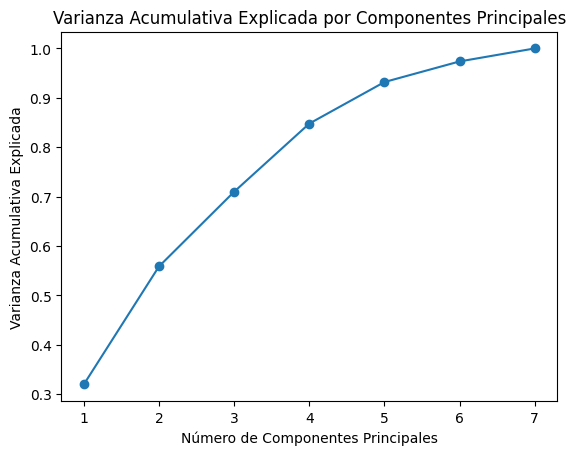

In [38]:
# Visualizacion de la suma acumulativa de la varianza explicada
varianza_explicada = pca.explained_variance_ratio_

varianza_acumulativa = varianza_explicada.cumsum()
print("Varianza acumulativa:", varianza_acumulativa)

plt.plot(range(1, len(varianza_acumulativa) + 1), varianza_acumulativa, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.title('Varianza Acumulativa Explicada por Componentes Principales')
plt.show()